In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [154]:
#read in the data
df_rural = pd.read_csv(f'data/2020_rural_cleaned.csv')
df_rural

,date,pm25,pm10,o3,no2,so2,co,city
0,2020-01-01,282,136,2,14,16,15,vapi
1,2020-01-02,223,139,2,11,23,17,vapi
2,2020-01-03,230,134,2,17,40,15,vapi
3,2020-01-04,217,115,2,12,49,15,vapi
4,2020-01-05,191,161,2,10,35,16,vapi
...,...,...,...,...,...,...,...,...
1255,2020-07-24,48,27,7,2,8,3,guwahati
1256,2020-07-25,56,29,9,1,8,2,guwahati
1257,2020-07-26,70,34,8,4,8,4,guwahati
1258,2020-07-27,74,34,9,4,8,3,guwahati


In [155]:
column_names = df_rural.columns.values
column_names[0] = 'Date'
column_names[7] = 'City'
df_rural.columns = column_names

# clean up: fix date column and filter so that just this year's data is included
df_rural.Date = pd.to_datetime(df_rural.Date, format = '%Y-%m-%d') # need the format string to specify which is the month and which is the year
df_rural['month_num'] = pd.DatetimeIndex(df_rural['Date']).month
df_rural['month_name'] = df_rural.Date.dt.month_name()
pollutant=['pm25','pm10','co','so2','o3','no2']
for i in pollutant:
    df_rural[i]=df_rural[i].replace(0,df_rural[i].mean())
df_rural.dtypes


print(df_rural.shape)
# just keep this year's data, discard everything else

#print(df_rural.shape)
print(df_rural['City'].unique())

(1260, 10)
['vapi' 'kota' 'mussoorie' 'jabalpur' 'coimbatore' 'guwahati']


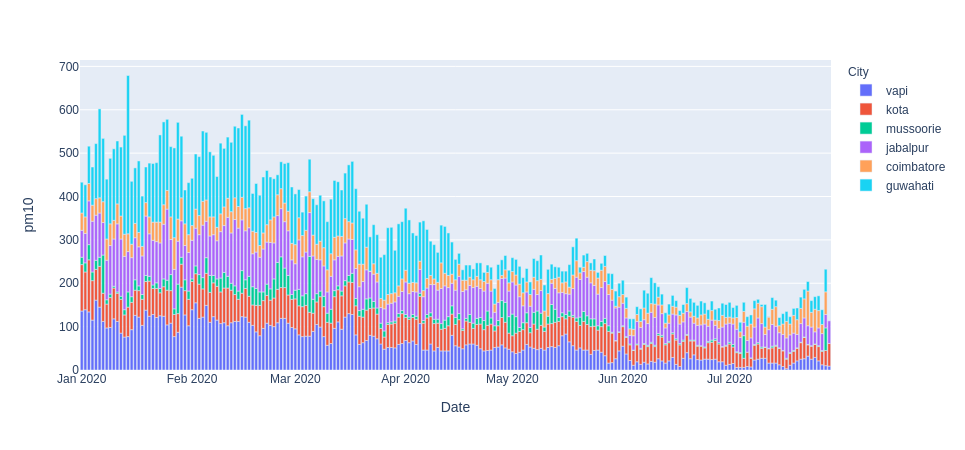

In [157]:
fig = px.bar(df_rural,'Date','pm10',color='City')
fig.show()
fig.write_image(f'images/rural_pm2.5_bar.png',width=1500,height=600)

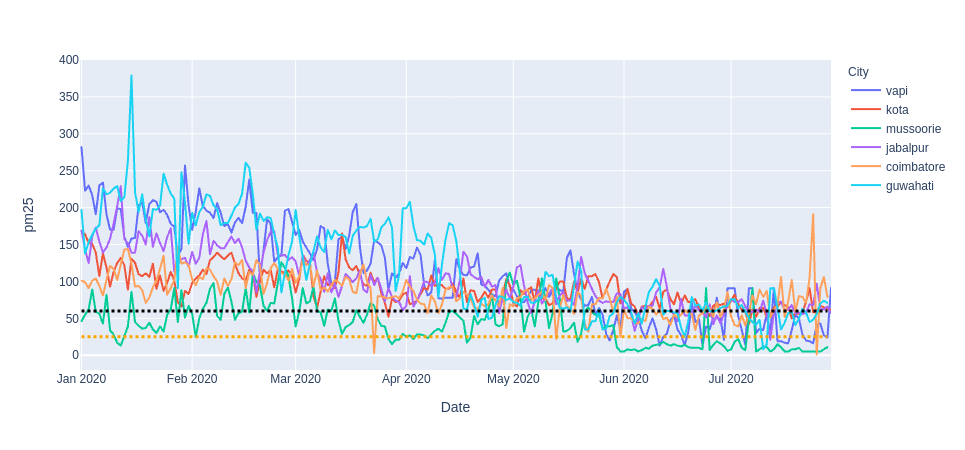

In [158]:
fig=px.line(df_rural,'Date','pm25',color='City')
fig.add_shape(type="line",
            x0='2020-01-01',
            y0=25,
            x1='2020-07-28',
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0='2020-01-01',
            y0=60,
            x1='2020-07-28',
            y1=60,
            line=dict(
                color="black",
                width=3,
                dash="dot",
            ))
fig.show()
fig.write_image(f'images/rural_pm2.5_allcity_line.png',width=1500,height=600)

In [159]:
df_reduced=df_rural[df_rural['City'].isin(['mussoorie','coimbatore','vapi','kota','guwahati'])]

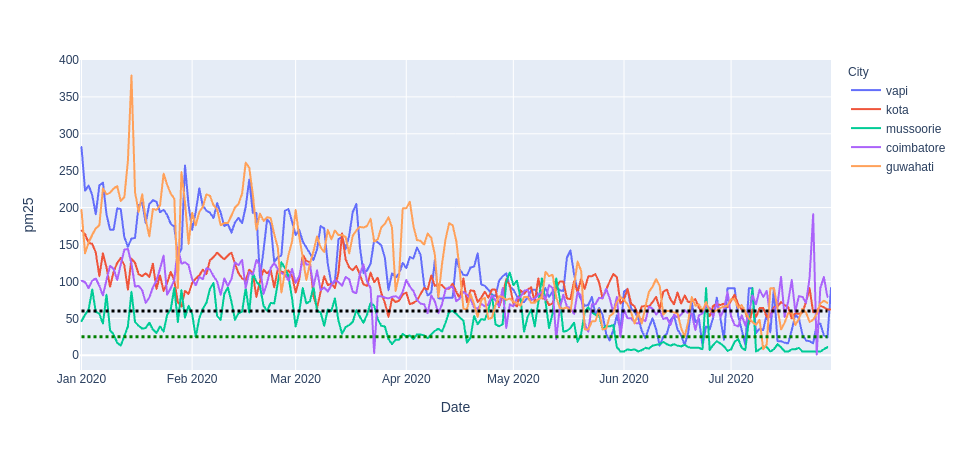

In [160]:
fig=px.line(df_reduced,'Date','pm25',color='City')
fig.add_shape(type="line",
            x0='2020-01-01',
            y0=25,
            x1='2020-07-28',
            y1=25,
            line=dict(
                color="green",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0='2020-01-01',
            y0=60,
            x1='2020-07-28',
            y1=60,
            line=dict(
                color="black",
                width=3,
                dash="dot",
            ))
fig.show()
fig.write_image(f'images/rural_pm2.5_3city_line.png',width=1500,height=600)

In [161]:
df_reduced=df_rural[df_rural['City'].isin(['mussoorie','coimbatore'])]


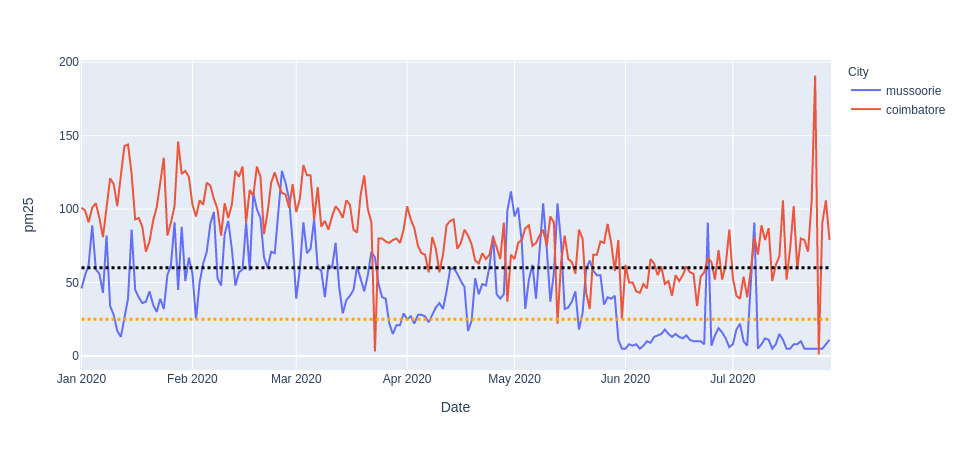

In [162]:
fig=px.line(df_reduced,'Date','pm25',color='City')
fig.add_shape(type="line",
            x0='2020-01-01',
            y0=25,
            x1='2020-07-28',
            y1=25,
            line=dict(
                color="orange",
                width=3,
                dash="dot",
            ))
fig.add_shape(type="line",
            x0='2020-01-01',
            y0=60,
            x1='2020-07-28',
            y1=60,
            line=dict(
                color="black",
                width=3,
                dash="dot",
            ))
fig.show()
fig.write_image(f'images/rural_pm2.5_2city_line.png',width=1500,height=600)

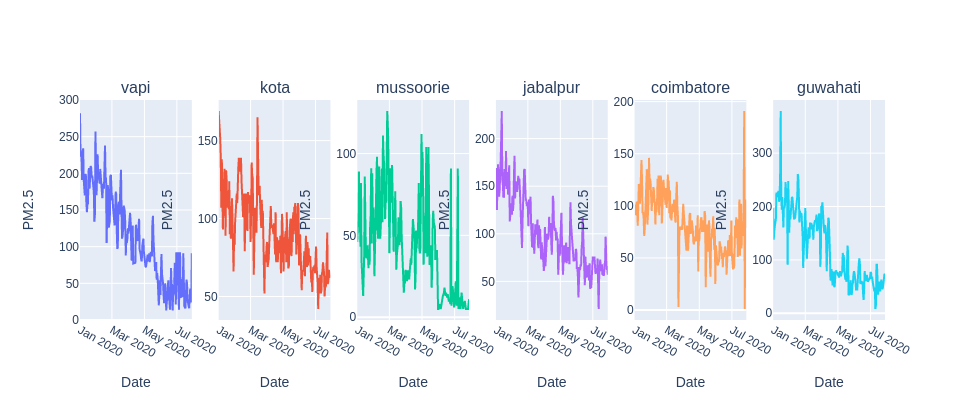

In [163]:
city=['vapi', 'kota', 'mussoorie', 'jabalpur', 'coimbatore', 'guwahati']
pollutant=['pm25','pm10','co','so2','o3','no2']

fig = make_subplots(
rows=1, cols=6,
subplot_titles=('vapi', 'kota', 'mussoorie', 'jabalpur', 'coimbatore', 'guwahati'))
for l,i in enumerate(city):
    dff=df_rural[df_rural['City'].isin([i])]
    fig.add_trace(go.Scatter(x=dff['Date'], y=dff['pm25']),row=1, col=l+1)
    fig.update_xaxes(title_text="Date", row=1, col=l+1)
    fig.update_yaxes(title_text="PM2.5", row=1, col=l+1)
fig.update_layout(height=400, width=2300,showlegend=False)
fig.update_layout(yaxis=dict(range=[0,300]))
fig.show()
fig.write_image(f'images/rural_pm2.5_all_cities.png')

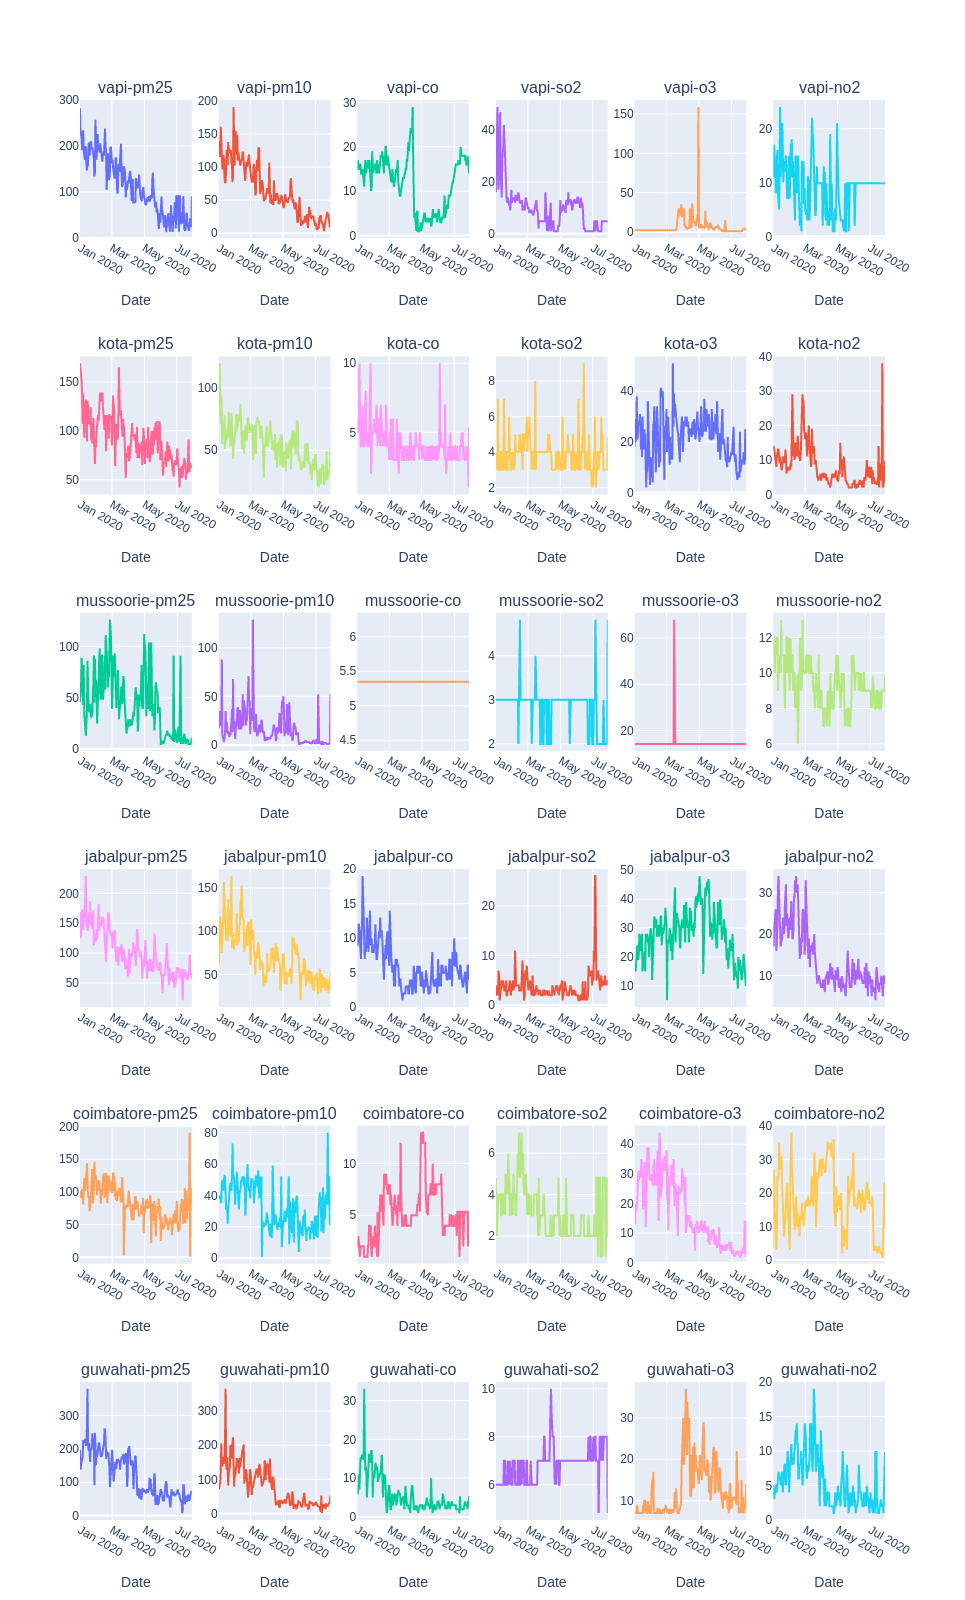

In [164]:
city=['vapi', 'kota', 'mussoorie', 'jabalpur', 'coimbatore', 'guwahati']
pollutant=['pm25','pm10','co','so2','o3','no2']
for i in city:
    for j in pollutant:
        entry= i + '-' + j
        titles.append(entry)
fig = make_subplots(
rows=6, cols=6,
subplot_titles=titles)
for l,i in enumerate(city):
    for u,j in enumerate(pollutant):
        dff=df_rural[df_rural['City'].isin([i])]
        fig.add_trace(go.Scatter(x=dff['Date'], y=dff[j]),row=l+1, col=u+1)
        fig.update_xaxes(title_text="Date", row=l+1, col=u+1)
        #fig.update_yaxes(title_text=j, row=l+1, col=u+1)
fig.update_layout(height=1600, width=1800,showlegend=False)
fig.update_layout(yaxis=dict(range=[0,300]))
fig.show()
fig.write_image(f'images/rural_all_allcity.png')